---
## <center>TECH20704A_PROJECT: The determinants of academic performance
## <center>Subject: "How do students' habits influence their GPA ?"
<center>To answer this problem we analysed 5 sub-questions</center>

Presented by: 
- Andreu Simeos Pedro 
- Hadzega Matus 
- Tshiya Wamonakeba Estha 


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import math

At first, we opened the dataset and printed first values.

In [8]:
#To check the contents of the CSV
df_students = pd.read_csv('student_lifestyle_dataset.csv')
pd.options.display.float_format = '{:,.2f}'.format
df_students.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.90,3.80,8.70,2.80,1.80,2.99,Moderate
1,2,5.30,3.50,8.00,4.20,3.00,2.75,Low
2,3,5.10,3.90,9.20,1.20,4.60,2.67,Low
3,4,6.50,2.10,7.20,1.70,6.50,2.88,Moderate
4,5,8.10,0.60,6.50,2.20,6.60,3.51,High


---
# Description of dataset
We checked, whether there are zero values and then we looked at types of the variables. We found out, that there are no zero values and categorical variables are of type float, except the Student_ID, which we are not going to need.
Stress_Level is of type object, thus we created the new column where we assigned the numbers to levels of stress, where 1 is the lowest and 3 is the highest.


In [9]:
df_students.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [10]:
df_students.dtypes

Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
dtype: object

In [11]:
mapping = {
    "Low": 1,
    "Moderate": 2,
    "High": 3
}

df_students['Stress_Category'] = df_students['Stress_Level'].map(mapping)

In [12]:
df_students.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Stress_Category
0,1,6.90,3.80,8.70,2.80,1.80,2.99,Moderate,2
1,2,5.30,3.50,8.00,4.20,3.00,2.75,Low,1
2,3,5.10,3.90,9.20,1.20,4.60,2.67,Low,1
3,4,6.50,2.10,7.20,1.70,6.50,2.88,Moderate,2
4,5,8.10,0.60,6.50,2.20,6.60,3.51,High,3


## Descriptive statistics of dataset
Below is the descriptive statistics of dataset, with the summary values such as mean, standard deviation, minimum, median, maximum, lower and upper quartile for each of numeric variables.

In [14]:
df_students[["Study_Hours_Per_Day","Extracurricular_Hours_Per_Day","Sleep_Hours_Per_Day","Social_Hours_Per_Day","Physical_Activity_Hours_Per_Day","GPA","Stress_Category"]].describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Category
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,7.48,1.99,7.50,2.70,4.33,3.12,2.37
std,1.42,1.16,1.46,1.69,2.51,0.30,0.73
min,5.00,0.00,5.00,0.00,0.00,2.24,1.00
25%,6.30,1.00,6.20,1.20,2.40,2.90,2.00
50%,7.40,2.00,7.50,2.60,4.10,3.11,3.00
75%,8.70,3.00,8.80,4.10,6.10,3.33,3.00
max,10.00,4.00,10.00,6.00,13.00,4.00,3.00


## Plots for each variable

Text(0.5, 1.0, 'Extracurricular hours')

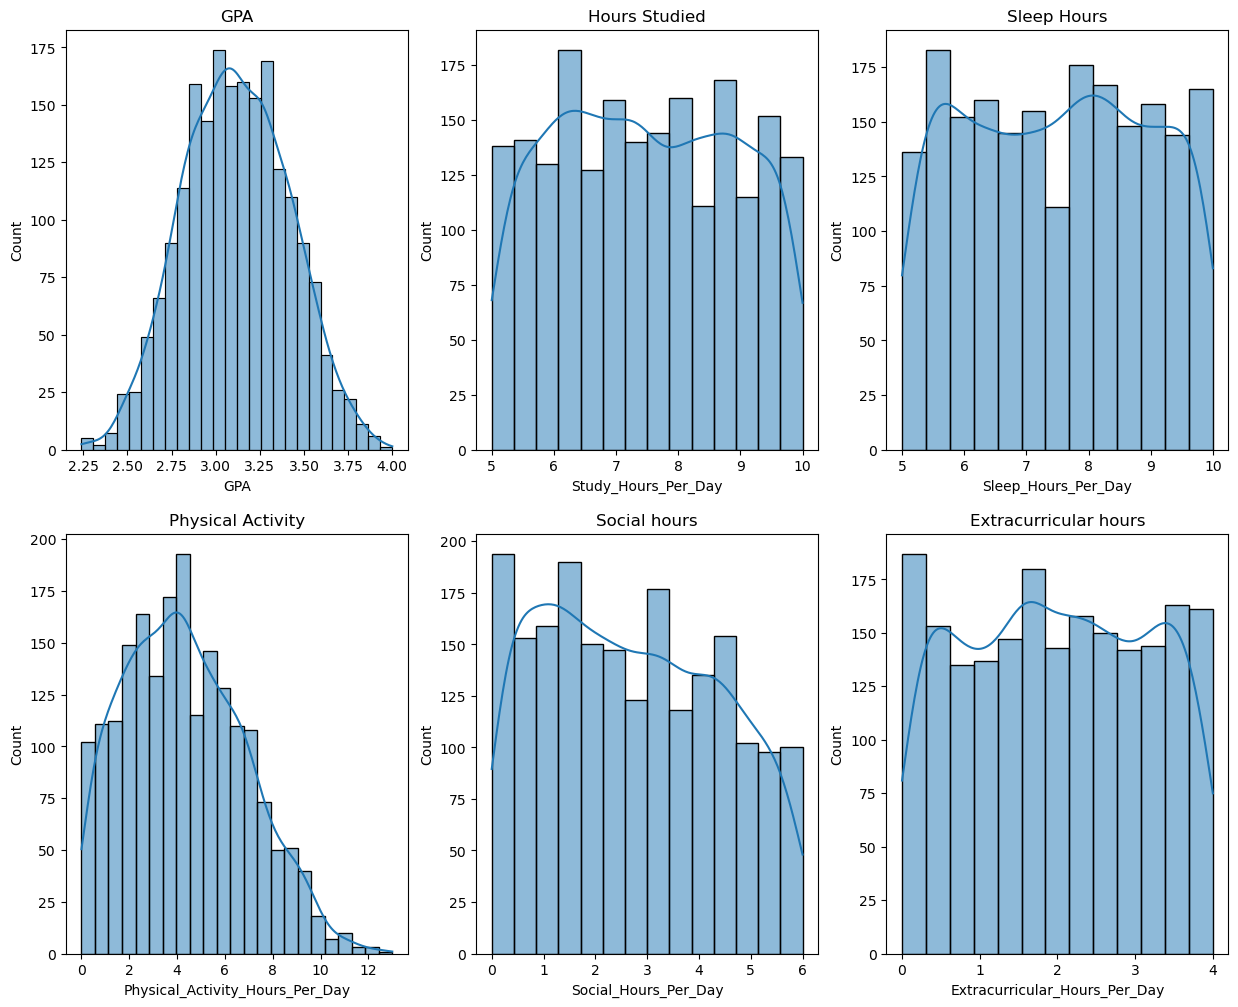

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# First variable
sns.histplot(df_students["GPA"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("GPA")

# Second variable
sns.histplot(df_students["Study_Hours_Per_Day"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Hours Studied")

# Third variable
sns.histplot(df_students["Sleep_Hours_Per_Day"], kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Sleep Hours")

# Fourth variable
sns.histplot(df_students["Physical_Activity_Hours_Per_Day"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Physical Activity")

# Fifth variable
sns.histplot(df_students["Social_Hours_Per_Day"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Social hours")

# Sixth variable
sns.histplot(df_students["Extracurricular_Hours_Per_Day"], kde=True, ax=axes[1, 2])
axes[1, 2].set_title("Extracurricular hours")

---
## Question 1: Which daily habits correlate most strongly with GPA ?
For answer to the first question, we created a correlation heatmap, which is the matrix that shows the levels of correlation for each of the variables.


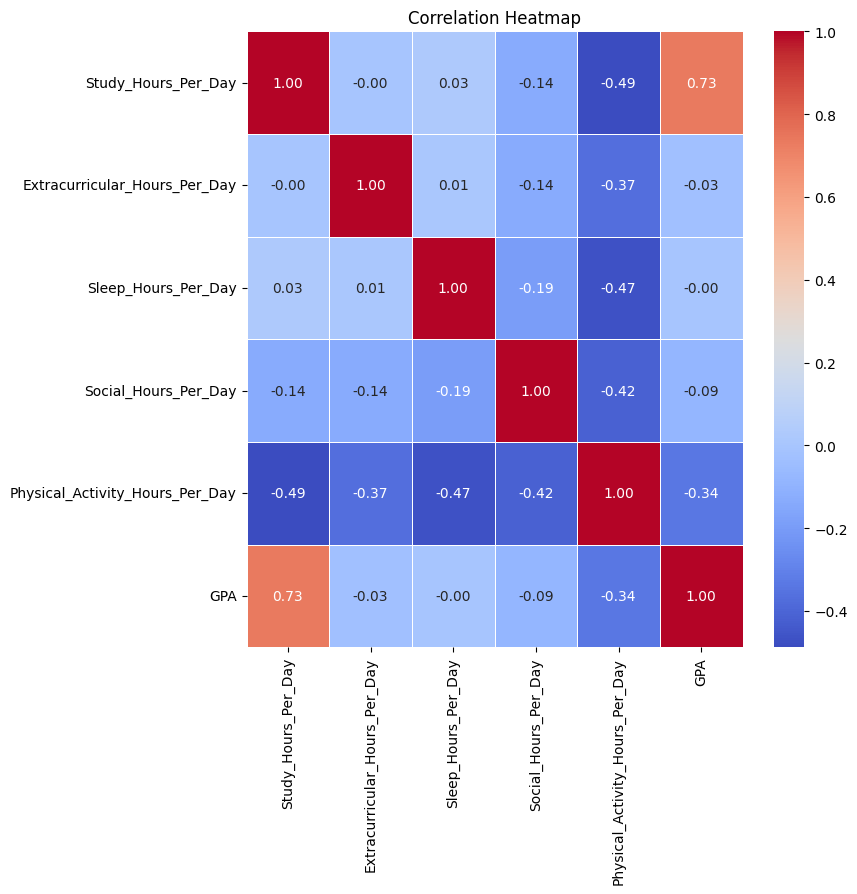

In [7]:
df_new = df_students.iloc[:, 1:]
df_num = df_new.drop(df_new.columns[[6]], axis=1)
correlation_matrix = df_num.corr()

plt.figure(figsize=(8, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Conclusion
As you can see in the heatmap, for GPA, we can see strong positive correlation with Study hours per day (+0.73), moderate positive correlation with Stress category (+0.55) and weak negative correlation with Physical activity hours per day. Other factors have very weak correlation levels with GPA.

---

## Question 2: Does increased study time lead to higher GPA ?
To answer this question, we plotted a scatter chart, where we can see growing trend, so we can expect, that higher amount of study hours shows affects the level of GPA in positive way. 

<Axes: xlabel='Study_Hours_Per_Day', ylabel='GPA'>

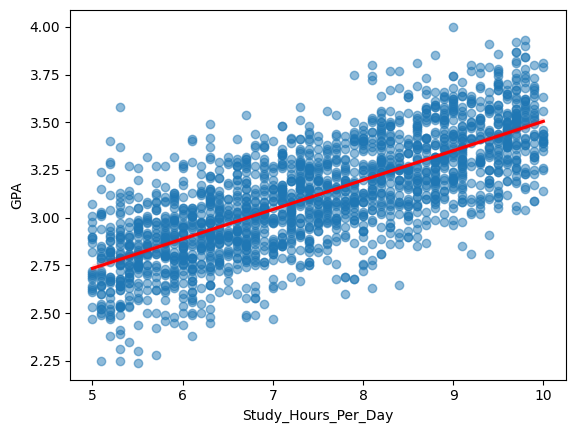

In [8]:
sns.regplot(data = df_students, x='Study_Hours_Per_Day', y='GPA', scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

In [9]:
#Summarizing the correlations findings on a pretty table 
corr_social = df_students["Study_Hours_Per_Day"].corr(df_students["GPA"])
table = PrettyTable()
table.field_names = ['Analysis','Correlation']
table.add_row(["Study_hours vs GPA", round(corr_social,3)])
print(table)

+--------------------+-------------+
|      Analysis      | Correlation |
+--------------------+-------------+
| Study_hours vs GPA |    0.734    |
+--------------------+-------------+


### Conclusion
We can see strong positive correlation between study hours per day and the value of GPA, so we can conclude, that the bigger amount of study hours affects the level of GPA in positive way. The correlation between studying hours per day and GPA is 0.734, which shows strong level of correlation.


---
## Question 3: How does sleep duration influence GPA ?

To answer this question, we plotted a scatter chart, where we can see stable trend, so we can expect, that higher amount of sleep hours shows no effect to the level of GPA. 

<Axes: xlabel='Sleep_Hours_Per_Day', ylabel='GPA'>

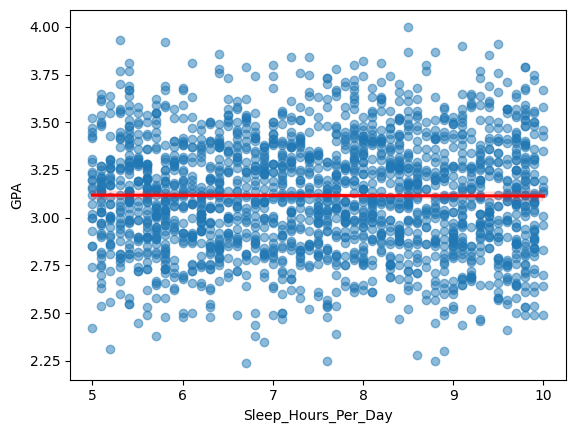

In [10]:
#Finding the relationship between social hours and GPA (Correlation )
sns.regplot(data = df_students, x='Sleep_Hours_Per_Day', y='GPA', scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

In [11]:
#Summarizing the correlations findings on a pretty table 
corr_social = df_students["Sleep_Hours_Per_Day"].corr(df_students["GPA"])
table = PrettyTable()
table.field_names = ['Analysis','Correlation']
table.add_row(["Sleep_hours vs GPA", round(corr_social,3)])
print(table)

+--------------------+-------------+
|      Analysis      | Correlation |
+--------------------+-------------+
| Sleep_hours vs GPA |    -0.004   |
+--------------------+-------------+


### Conclusion
Our analysis shows that sleeping has very weak correlation with GPA, it is safe to say, that there is almost no correlation at all.

#### Sleep Hours vs GPA (Correlation = –0.004)

The correlation between sleep hours per day and GPA is –0.004, which is extremely weak.
This indicates that time spent sleeping has almost no measurable linear impact on academic performance in this dataset. Students who sleep more do not appear to have significantly higher or lower GPAs than those who sleep less.

---

## Question 4: Do extracurricular activities affect GPA positively or negatively ?

To answer this question, we plotted a scatter chart, where we can see stable trend, so we can expect, that higher amount of extracurricular activities hours shows no effect to the level of GPA. 

<Axes: xlabel='Extracurricular_Hours_Per_Day', ylabel='GPA'>

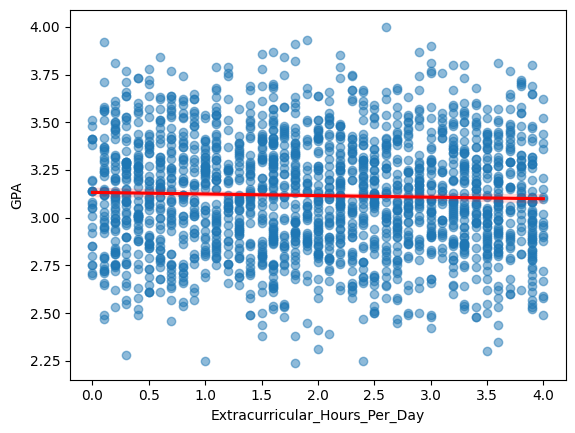

In [12]:
#Finding the relationship between extracuricullar hours and GPA (Correlation )
sns.regplot(data = df_students, x='Extracurricular_Hours_Per_Day', y='GPA', scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

In [13]:
#Summarizing the correlations findings on a pretty table 
corr_social = df_students["Extracurricular_Hours_Per_Day"].corr(df_students["GPA"])
table = PrettyTable()
table.field_names = ['Analysis','Correlation']
table.add_row(["Extracurricular_hours vs GPA", round(corr_social,3)])
print(table)

+------------------------------+-------------+
|           Analysis           | Correlation |
+------------------------------+-------------+
| Extracurricular_hours vs GPA |    -0.032   |
+------------------------------+-------------+


### Conclusion
Our analysis shows that sleeping has very weak correlation with GPA, it is safe to same, that there is almost no correlation at all.

#### Extracurricular Activity Hours vs GPA (Correlation = –0.032)

The correlation between extracurricular activity hours per day and GPA is –0.032, which is extremely weak.
This indicates that time spent on extracurricular activities has almost no measurable linear impact on academic performance in this dataset. Students who do these activities more do not appear to have significantly higher or lower GPAs than those who do them less.


---
## Question 5_Does time spent socializing or exercising relate to GPA ?

<Axes: xlabel='Social_Hours_Per_Day', ylabel='GPA'>

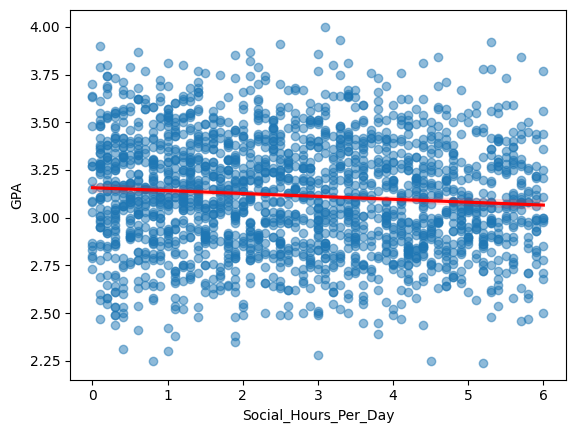

In [14]:
#Finding the relationship between social hours and GPA (Correlation )
sns.regplot(data = df_students, x='Social_Hours_Per_Day', y='GPA', scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

<Axes: xlabel='Physical_Activity_Hours_Per_Day', ylabel='GPA'>

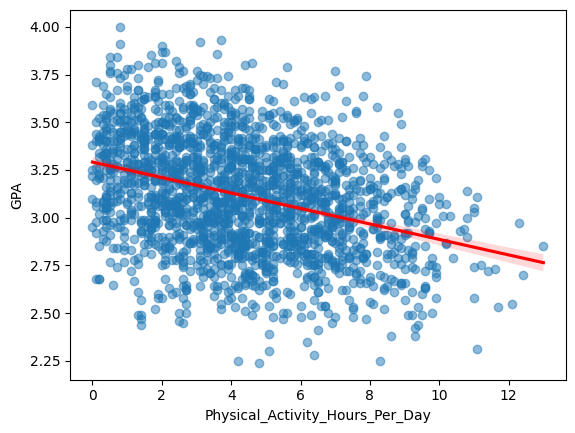

In [15]:
#Finding the relationship between Activity hours per day and GPA
sns.regplot(data = df_students, x='Physical_Activity_Hours_Per_Day', y='GPA', scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

In [17]:
#Summarizing the correlations findings on a pretty table 
corr_social = df_students["Social_Hours_Per_Day"].corr(df_students["GPA"])
corr_activ  = df_students["Physical_Activity_Hours_Per_Day"].corr(df_students["GPA"])
table = PrettyTable()
table.field_names = ['Analysis','Correlation']
table.add_row(["Social_hours vs GPA", round(corr_social,3)])
table.add_row(["Physical_activity vs GPA", round(corr_activ, 3)])
print(table)

+--------------------------+-------------+
|         Analysis         | Correlation |
+--------------------------+-------------+
|   Social_hours vs GPA    |    -0.086   |
| Physical_activity vs GPA |    -0.341   |
+--------------------------+-------------+


### Conclusion
Our analysis shows that both socializing and physical activity have negative correlations with GPA, but the strength of these relationships differs substantially.

#### Social Hours vs GPA (Correlation = –0.09)

The correlation between social hours per day and GPA is –0.09, which is extremely weak.
This indicates that time spent socializing has almost no measurable linear impact on academic performance in this dataset. Students who socialize more do not appear to have significantly higher or lower GPAs than those who socialize less.

#### Physical Activity Hours vs GPA (Correlation = –0.34)

The correlation between physical activity hours per day and GPA is –0.34, which represents a weak negative relationship.
This suggests that students who spend more time on physical activities tend to have slightly lower GPAs, although the relationship is not strong enough to imply causation. It may simply reflect time trade-offs—students who devote more hours to workouts or sports may have less time available for studying.

#### Overall Conclusion

While both habits show negative associations with GPA, only physical activity shows a noticeable pattern.
However, even this relationship is moderate, not strong, meaning that other factors likely play a much larger role in determining academic performance. Socializing appears to have virtually no meaningful effect on GPA.